# 1. Load packages

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import tensorflow.keras as keras

from keras.datasets import fashion_mnist


# 2. Read data

In [12]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# 3. Data Exploration

In [14]:
def plot_images(data, label, nrows = 3, ncols = 3):
    """
    Display  `nrows*ncols` images randomly from data_dir folder
    """
    fig = plt.figure(figsize = (nrows*ncols , nrows*ncols))

    for i in range(1, nrows*ncols + 1):
        sample_idx = tf.random.uniform((1,1), maxval=len(data), dtype= tf.dtypes.int32).numpy().item() # lấy ngẫu nhiên các mẫu trong dữ liệu
        fig.add_subplot(nrows, ncols, i)
        plt.imshow(data[sample_idx], cmap='gray')
        plt.axis("off")
        plt.title(label[sample_idx])

    # fig.suptitle(label[sample_idx], fontweight = 'bold') 
    plt.tight_layout()
    plt.show()

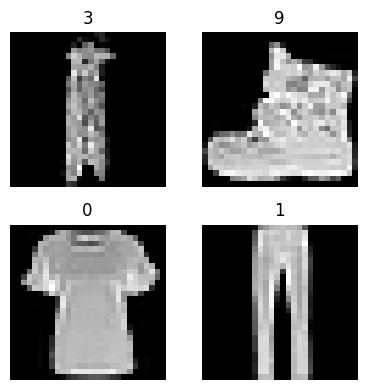

In [15]:
plot_images(X_train, y_train,2,2)

In [16]:
print("Labels of data: ", np.unique(y_train))

Labels of data:  [0 1 2 3 4 5 6 7 8 9]


# 4. Normalize data

In [17]:
# Flatten data
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [18]:
# ép kiểu data về kiểu float
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

In [19]:
# data normalization
mean = np.mean(X_train)
std  = np.std(X_train)

X_train = (X_train-mean)/std
X_test  = (X_test-mean)/std

# 5. Create and train model

In [20]:
# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


- Batch size = 256
- Epoch = 100
- learning-rate = 0.01

In [21]:
# optimizer and loss
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=256, 
                    epochs=100, verbose=2)

Epoch 1/100
235/235 - 3s - loss: 0.8218 - sparse_categorical_accuracy: 0.7192 - val_loss: 0.6228 - val_sparse_categorical_accuracy: 0.7808 - 3s/epoch - 14ms/step
Epoch 2/100
235/235 - 1s - loss: 0.5542 - sparse_categorical_accuracy: 0.8069 - val_loss: 0.5456 - val_sparse_categorical_accuracy: 0.8051 - 558ms/epoch - 2ms/step
Epoch 3/100
235/235 - 1s - loss: 0.4989 - sparse_categorical_accuracy: 0.8251 - val_loss: 0.5095 - val_sparse_categorical_accuracy: 0.8176 - 539ms/epoch - 2ms/step
Epoch 4/100
235/235 - 1s - loss: 0.4685 - sparse_categorical_accuracy: 0.8361 - val_loss: 0.4915 - val_sparse_categorical_accuracy: 0.8280 - 531ms/epoch - 2ms/step
Epoch 5/100
235/235 - 1s - loss: 0.4478 - sparse_categorical_accuracy: 0.8423 - val_loss: 0.4752 - val_sparse_categorical_accuracy: 0.8307 - 529ms/epoch - 2ms/step
Epoch 6/100
235/235 - 1s - loss: 0.4322 - sparse_categorical_accuracy: 0.8483 - val_loss: 0.4645 - val_sparse_categorical_accuracy: 0.8381 - 526ms/epoch - 2ms/step
Epoch 7/100
235/23

# 6. Result

<function matplotlib.pyplot.show(close=None, block=None)>

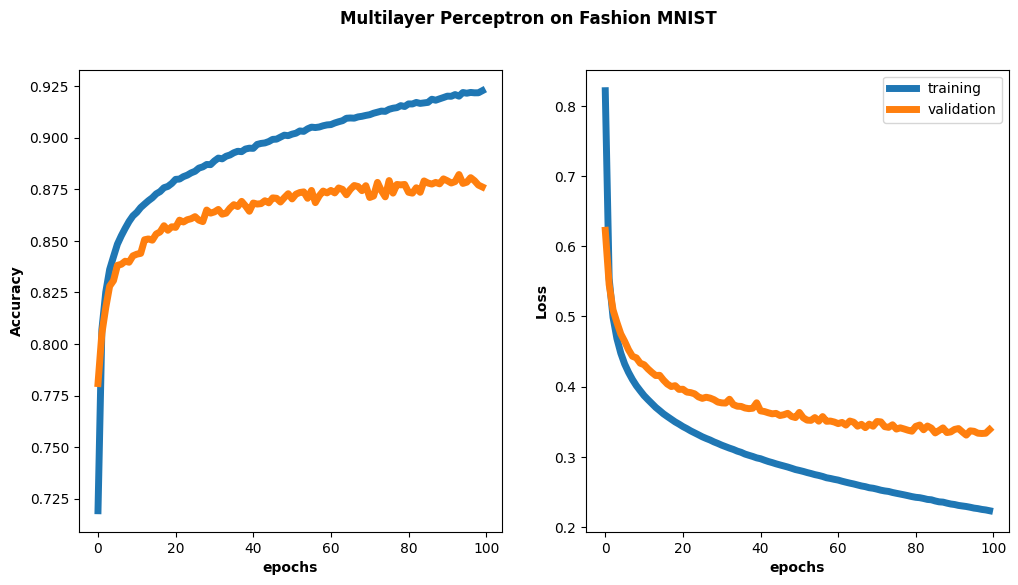

In [23]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(range(len(history.history['sparse_categorical_accuracy'])), history.history['sparse_categorical_accuracy'], label='training', linewidth = 5)
axs[0].plot(range(len(history.history['val_sparse_categorical_accuracy'])), history.history['val_sparse_categorical_accuracy'], label='validation', linewidth = 5)
axs[1].plot(range(len(history.history['loss'])), history.history['loss'], label='training', linewidth = 5)
axs[1].plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='validation', linewidth = 5)
axs[0].set_xlabel("epochs", fontweight = 'bold')
axs[1].set_xlabel("epochs", fontweight = 'bold')
axs[0].set_ylabel("Accuracy", fontweight = 'bold')
axs[1].set_ylabel("Loss", fontweight = 'bold')
plt.legend()
fig.suptitle("Multilayer Perceptron on Fashion MNIST", fontweight = 'bold')
plt.show